In [1]:
import sys
import pypsa
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

idx = pd.IndexSlice

sys.path.append(str(
    Path.cwd().parent / 'scripts'
))


In [2]:
bmus = pd.read_csv(
    Path.cwd().parent /
    'data' /
    'prerun' /
    'prepared_bmus.csv',
    index_col=0
    )
plants = bmus.loc[bmus.carrier.str.contains('wind')].index

In [3]:
cfd_strike_prices = pd.read_csv(
    Path.cwd().parent / 'data' / 'prerun' / 'cfd_strike_prices.csv',
    index_col=0,
    parse_dates=True
    )

roc_values = pd.read_csv(
    Path.cwd().parent / 'data' / 'prerun' / 'roc_values.csv',
    index_col=0
    ).iloc[:,0]

In [4]:
path = Path.cwd().parent / 'data' / 'base'
day_range = pd.date_range(start='2024-03-01', end='2024-03-31', freq='D')

bids = []

for day in day_range:
    bids.append(pd.read_csv(
        path / day.strftime('%Y-%m-%d') / 'bids.csv',
        index_col=[0,1], 
        parse_dates=True,
        ))

bids = pd.concat(bids)
bids = bids[plants.intersection(bids.columns)]
bids = bids.loc[idx[:,'vol'], :]
bids.index = bids.index.get_level_values(0)

<Axes: >

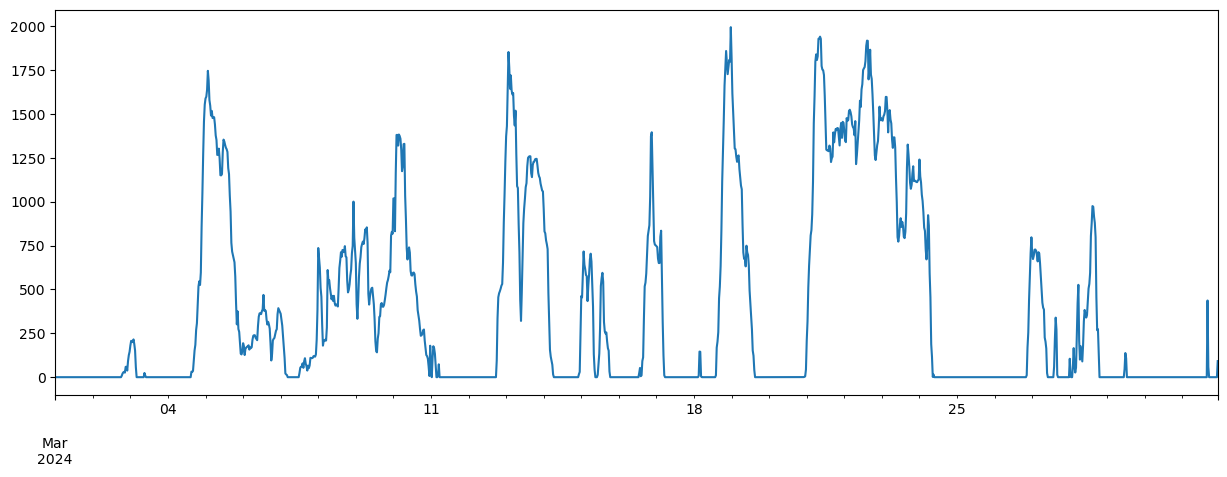

In [5]:
fig, ax = plt.subplots(figsize=(15, 5))

bids.replace(np.nan, 0).sum(axis=1).plot(ax=ax)